# Activation Functions 

In [32]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
fmnist = tf.keras.datasets.fashion_mnist 
(train_images, train_labels),(test_images,test_labels)= fmnist.load_data()
(X_train,y_train),(X_test,y_test)= fmnist.load_data() 
assert X_train.shape == (60000,28,28)
assert X_test.shape ==(10000,28,28)
assert y_train.shape ==(60000,)
assert y_test.shape == (10000,)

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


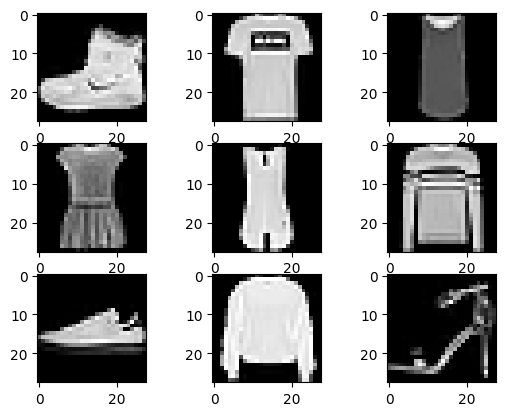

In [33]:
# summarize the data 
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))
# plot first few images 
for i in range(9):
    plt.subplot(330+1+i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [34]:
# normalize tha data 
X_train = X_train/255.0
X_test = X_test/255.0

In [35]:
# making the model 
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])
# compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train,epochs=5)
test_loss , test_acc = model.evaluate(X_test,y_test) 
print('Test accuray:',test_acc)

c:\Users\HP\miniconda3\envs\tf_env\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 129s 64ms/step - accuracy: 0.2444 - loss: 2.5609
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.2478 - loss: 2.3003
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - accuracy: 0.2335 - loss: 2.2952
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 194s 99ms/step - accuracy: 0.1729 - loss: 2.3002
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.2131 - loss: 2.2865
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.2163 - loss: 2.2987
Test accuray: 0.21070000529289246


In [36]:
# making prediction with model 
predictions = model.predict(X_test)
# printing shape of prediction 
print(predictions.shape)
# printing first ten predictions 
print(predictions[0:10])
# class labels 
class_labels =[tf.argmax(prediction) for prediction in predictions]
print(class_labels[0:10])

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
(10000, 10)
[[ -2.6736898   -1.823878    -2.9683175   -3.1407568   -4.2726216
   -4.7017875   -2.8128173   -2.8155034   -2.451805    -1.9214771 ]
 [ -5.922213    -6.2723265   -4.914045    -7.7010455  -12.749663
  -11.499343    -8.291146   -10.891247    -5.886656    -8.831897  ]
 [ -3.0700243   -3.0469708   -3.9024334   -4.2231436   -7.3072968
   -6.4135146   -4.877936    -4.8921876   -3.2101114   -4.505176  ]
 [ -2.1216562   -2.0178015   -2.4834228   -3.042945    -5.1520433
   -4.4343233   -3.486506    -3.622683    -2.385032    -3.0823371 ]
 [ -3.6678853   -3.5420198   -3.7241137   -4.8249826   -8.530451
   -7.343978    -5.4318485   -6.3782578   -3.6502726   -5.3565526 ]
 [ -2.965141    -3.273521    -3.8860865   -4.1147704   -7.128137
   -6.132554    -4.9037614   -4.9861574   -2.6062193   -4.842484  ]
 [ -1.6532434   -2.1553214   -1.0118392   -2.3194606   -3.548931
   -3.230439    -2.07277     -3.2398214   -1.3952347   -3.0629842 ]
 [ -2.755860

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 32ms/step - accuracy: 0.2140 - loss: 2.3000 - val_accuracy: 0.2109 - val_loss: 2.2994
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 28ms/step - accuracy: 0.2134 - loss: 2.2988 - val_accuracy: 0.2147 - val_loss: 2.3026
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 41ms/step - accuracy: 0.2095 - loss: 2.3026 - val_accuracy: 0.2147 - val_loss: 2.3026
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 43ms/step - accuracy: 0.2105 - loss: 2.3026 - val_accuracy: 0.2147 - val_loss: 2.3026
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 36ms/step - accuracy: 0.2110 - loss: 2.3026 - val_accuracy: 0.2147 - val_loss: 2.3026


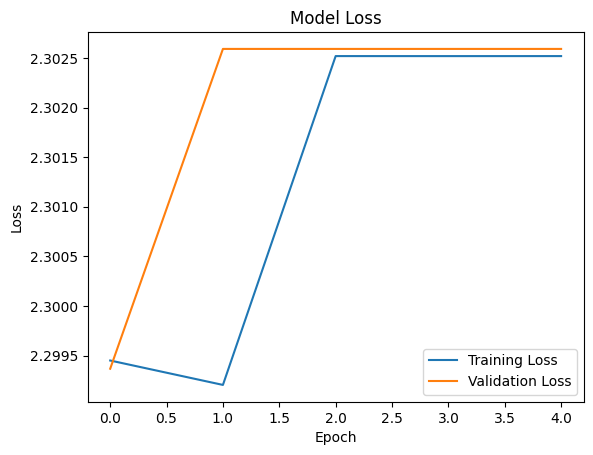

In [37]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')          
plt.plot(history.history['val_loss'], label='Validation Loss')    
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

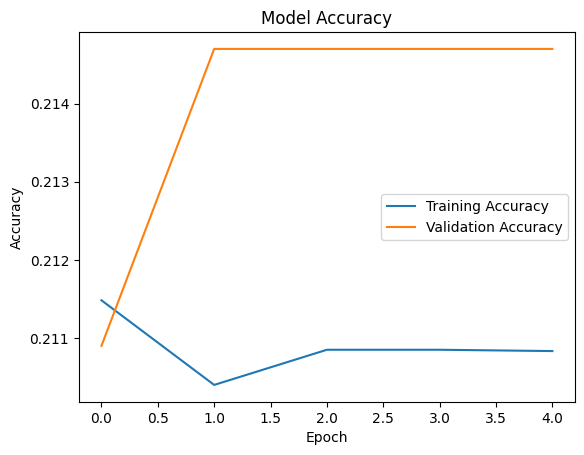

In [39]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  
plt.title('Model Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()